In [1]:
### CODEBASE ###
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def load_from_saved(filename):
    with open(f"saved_graphs/{filename}", 'r') as file:
        data = nx.readwrite.node_link_graph(json.loads(file.read()))
        return data
def draw(gr: nx.Graph, ax, label=None, circular=False):
    if circular:
        pos = nx.circular_layout(gr)
    else:
        pos = nx.nx_pydot.graphviz_layout(gr, prog='neato')
    if label is not None:
        ax.title.set_text(label)
    nx.draw(gr, ax=ax, pos=pos, node_size=500, with_labels=True, node_color="#ADD8E6")
def get_color(num: float):
    black = "#000000"
    blue = "#0000FF"
    colors = ["#006401", "#69B34C", "#ACB334", "#FAB733", "#FF8E15", "#FF4E11", "#FF0D0D"]
    biases = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
    if num > 1:
        return black
    elif num < 0:
        return blue
    for i in range(len(biases)):
        if num < biases[i]:
            return colors[i]
    return colors[-1]

def draw_with_flow_capacity(gr: nx.Graph, ax, label=None, circular=False):
    labels = nx.get_edge_attributes(gr, 'a')
    if circular:
        pos = nx.circular_layout(gr)
    else:
        pos = nx.nx_pydot.graphviz_layout(gr, prog='neato')
    edges = gr.edges()
    colors = []
    widths = []
    max_capacity = 0
    for edge in edges:
        filled = gr[edge[0]][edge[1]]['a'] / C[gr.name][(edge[0], edge[1])]
        colors.append(get_color(filled))
    for edge in edges:
        if C[gr.name][(edge[0], edge[1])] > max_capacity:
            max_capacity = C[gr.name][(edge[0], edge[1])]
    for edge in edges:
        width = C[gr.name][(edge[0], edge[1])] / max_capacity * 5
        widths.append(width)
    if label is not None:
        ax.title.set_text(label)
    nx.draw(gr, pos, ax=ax, with_labels=True, edge_color=colors, node_size=500, width=widths, node_color="#ADD8E6")
    nx.draw_networkx_edge_labels(gr, pos=pos, ax=ax, edge_labels=labels)
    

In [2]:
### GLOBALS
from copy import deepcopy
keys = ["line", "circular", "upgraded_circular", "double_circular", "best_random"]
graphs = {
    "line": load_from_saved("line.json"),
    "circular":load_from_saved("circular.json"),
    "upgraded_circular":load_from_saved("upgraded_circular_topology.json"),
    "double_circular":load_from_saved("double_circular.json"),
    "best_random":load_from_saved("best_random.json")
}
labels = dict(zip(keys, ["1. Graf Liniowy", "2. Graf Kolisty", "3. Graf Kolisty z liniami naprzeciwko", "4. Dwa koła połączone ze sobą", 
          "5. Graf, gdzie 2 <= ilosc krawedzi z wierzcholka <= 3 z moich badan"]))
circular = dict(zip(keys, [True, False, True, False, False]))
saved_edges = dict()
C = dict()
for key in keys:
    C[key] = dict()
    saved_edges[key] = deepcopy(list(graphs[key].edges()))


# Lista nr 2 - Modelowanie niezawodności sieci 
Rozważmy model sieci S. Przez $N=[n(i,j)]$ będziemy oznaczać macierz natężeń strumienia pakietów, gdzie element n(i,j) jest liczbą pakietów przesyłanych (wprowadzanych do sieci) w ciągu sekundy od źródła v(i) do ujścia v(j).
* Zaproponuj topologię grafu G ale tak aby żaden wierzchołek nie był izolowany oraz aby: |V|=20, |E|<30. Zaproponuj N oraz następujące funkcje krawędzi ze zbioru H: funkcję przepustowości 'c' (rozumianą jako maksymalną liczbę bitów, którą można wprowadzić do kanału komunikacyjnego w ciągu sekundy), oraz funkcję przepływu 'a' (rozumianą jako faktyczną liczbę pakietów, które wprowadza się do kanału komunikacyjego w ciągu sekundy). Pamiętaj aby funkcja przeplywu realizowała macierz N oraz aby dla każdego kanału 'e' zachodziło: c(e) > a(e).
* Niech miarą niezawodności sieci jest prawdopodobieństwo tego, że w dowolnym przedziale czasowym, nierozspójniona sieć zachowuje T < T_max, gdzie: T = 1/G * Σ_{e} a(e)/(c(e)/m - a(e)), jest średnim opóźnieniem pakietu w sieci, Σ_{e} oznacza sumowanie po wszystkich krawędziach 'e' ze zbioru E, 'G' jest sumą wszystkich elementów macierzy natężeń, a 'm' jest średnią wielkością pakietu w bitach. Napisz program szacujący niezawodność takiej sieci przyjmując, że prawdopodobieństwo nieuszkodzenia każdej krawędzi w dowolnym interwale jest równe 'p'. Uwaga: 'N', 'p', 'T_max' oraz topologia wyjściowa sieci są parametrami.
* Przy ustalonej strukturze topologicznej sieci i dobranych przepustowościach stopniowo zwiększaj wartości w macierzy natężeń. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max])?
* Przy ustalonej macierzy natężeń i strukturze topologicznej stopniowo zwiększaj przepustowości. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max])?
* Przy ustalonej macierzy natężeń i pewnej początkowej strukturze topologicznej, stopniowo zmieniaj topologię poprzez dodawanie nowych krawędzi o przepustowościach będących wartościami średnimi dla sieci początkowej. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max])?
* Napisz sprawozdanie zawierające opis zrealizowanych programów, komentarz do przeprowadzonych badań oraz wnioski.

Będziemy badać następujące grafy pod względem niezawodności:

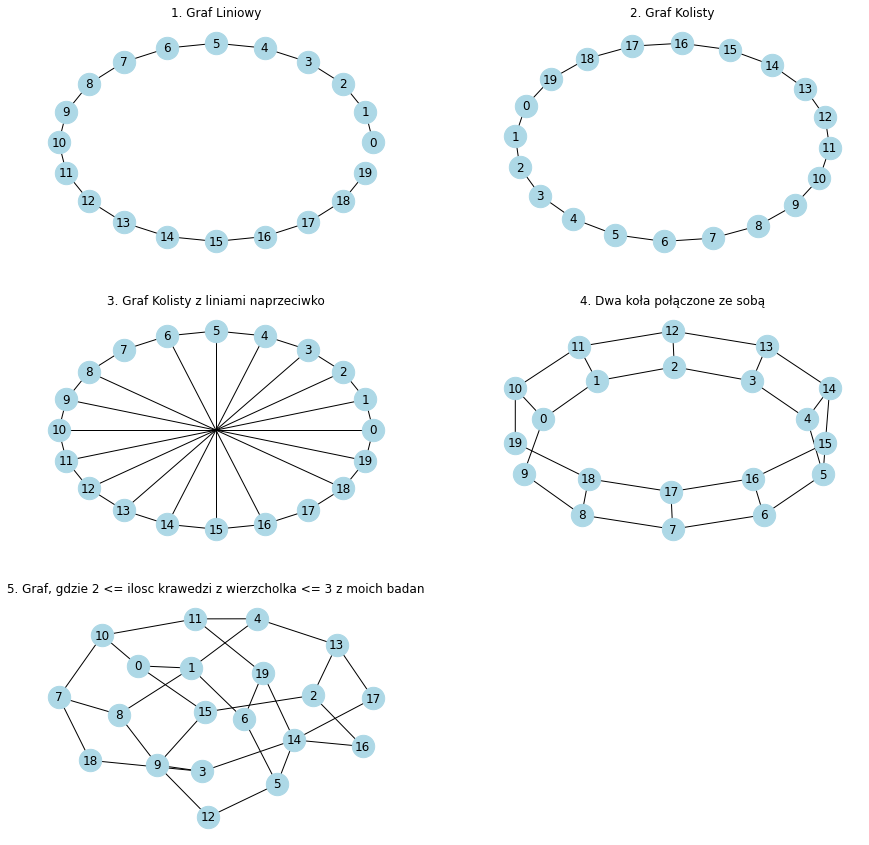

In [3]:
from copy import deepcopy
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs[2][1].remove()
axses = dict(zip(keys, [axs[0][0], axs[0][1], axs[1][0], axs[1][1], axs[2][0]]))
for key in keys:
    graphs[key].name = key
    draw(graphs[key], ax=axses[key], label=labels[key], circular=circular[key])
plt.show()

Do Tego bedziemy uzywac nastepujacej macierzy natężeń  
W moim systemie $$ | \{(i, j) \in \{0..19\}x\{0..19\}: N[i][j] \neq 0\}| \simeq \frac{1}{3} |V^2| $$

In [4]:
import random
def create_random_intensity(vector_amount=20, low=1, high=10):
    N = np.random.randint(low, high, size=(vector_amount, vector_amount))
    for i in range(vector_amount):
        N[i][i] = 0
        
    goal = vector_amount*vector_amount//3
    now = vector_amount*vector_amount-vector_amount
    to_delete = now - goal
    rows, cols = np.where(N != 0)
    edges = list(zip(rows, cols))
    sample_to_delete = random.sample(edges, to_delete)
    for to_del in sample_to_delete:
        N[to_del[0]][to_del[1]] = 0
    return N
N = create_random_intensity()
print("Macierz natężeń N")
print(N)

Macierz natężeń N
[[0 2 1 4 0 6 0 0 2 0 0 0 0 4 0 8 4 0 0 3]
 [0 0 0 2 0 3 0 0 0 0 1 0 0 4 0 1 0 1 8 3]
 [0 0 0 0 0 0 0 0 0 0 7 0 3 0 0 0 0 1 0 0]
 [0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 2 0 0 3 0]
 [4 0 0 0 0 0 8 1 5 1 8 0 0 0 8 1 9 0 0 2]
 [9 0 0 0 0 0 5 0 8 0 0 0 7 2 0 0 0 0 0 0]
 [9 6 0 0 0 9 0 4 0 4 1 7 0 0 0 0 0 1 0 7]
 [5 0 4 0 0 8 0 0 0 0 5 0 0 0 0 5 0 0 3 0]
 [0 0 0 9 4 0 0 0 0 9 0 0 4 2 6 0 0 0 7 0]
 [0 0 3 0 0 0 3 0 0 0 7 8 0 1 0 8 0 0 0 5]
 [0 0 0 0 0 0 0 0 6 3 0 5 5 3 0 0 4 0 0 0]
 [6 0 0 0 9 0 0 0 0 7 0 0 0 0 2 0 0 0 0 0]
 [0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 1 0]
 [0 0 0 0 1 3 9 0 0 0 0 0 0 0 7 5 9 0 6 0]
 [0 0 8 6 0 0 7 9 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 9 1 9 7 3 1 0 0 7 0 1 0 6 0 0 0]
 [5 6 0 0 0 0 0 2 9 4 0 0 8 0 0 7 0 0 0 0]
 [8 0 1 0 5 6 0 1 0 0 5 3 0 0 0 0 5 0 0 0]
 [0 7 7 2 0 0 0 0 6 8 0 0 1 0 0 1 0 6 0 0]
 [5 0 0 9 4 8 0 4 0 4 0 0 0 0 0 9 0 0 0 0]]


Dzięki temu możemy zdefiniować funkcje przepływu jako  
a(e) = Suma wszystkich natężeń, których ścieżki przechodzą przez e  
Następnie $c(e) = multiplier*a(e) + add$  
gdzie $multiplier=1.2$, a $add=100$
Pozwala to nam zobaczyć jak wyglądają przepływy na krawędziach.  

In [5]:
def bfs(graph: nx.Graph, node1, node2) -> list:
    visited = [node1]
    parents = {node1: None}
    queue = [node1]
    while len(queue) != 0:
        node = queue.pop(0)
        adjacents = list(sorted(graph.adj[node].keys()))
        for adjacent in adjacents:
            if adjacent not in visited:
                queue.append(adjacent)
                visited.append(adjacent)
                parents[adjacent] = node
    path = []
    node = node2
    while node != node1:
        path.append((parents[node], node))
        node = parents[node]
    return path

def calculateA(graph: nx.Graph, path_algorithm=bfs):
    for row, col in graph.edges():
        graph[row][col]['a'] = 0
    rows, cols = np.where(N != 0)
    goals = zip(rows, cols)
    for node1, node2 in goals:
        path = path_algorithm(graph, node1, node2)
        for edge in path:
            graph[edge[0]][edge[1]]['a'] += N[node1][node2]
            
def setC(graph: nx.Graph, multiplier=1.3, add=100):
    calculateA(graph)
    for row, col in graph.edges():
        C[graph.name][(row, col)] = graph[row][col]['a'] * multiplier + add

for key in keys:
    setC(graphs[key])
    


Przy okazji zdefiniujmy też niezawodność naszego grafu:  
reliability(Graf, p, T_max) to:  
Prawdopodobienstwo na to że po zdegradowaniu Grafu T < T_max, gdzie  
degradacja polega na usunięciu dowolnej krawędzi z prawdopodobienstwem 1-p, a
$$T = \frac{1}{G} * \sum_{e\in Edges} \frac{a(e)}{\frac{c(e)}{m} - a(e)}$$

W moim systemie jeden pakiet składa się z 1 bita. Zatem $m=1$

In [6]:
def is_fine(graph: nx.Graph):
    if not nx.is_connected(graph): return False
    for edge in graph.edges():
        if C[graph.name][(edge[0],edge[1])] <= graph[edge[0]][edge[1]]['a']:
            return False
    return True

def degrade(graph: nx.Graph, p=0.95):
    to_delete = []
    for edge in graph.edges():
        delete = np.random.random() > p
        if delete: to_delete.append(edge)
    for edge in to_delete:
        graph.remove_edge(edge[0], edge[1])

def calculateT(gr: nx.Graph):
    G = 0
    for row in range(20):
        for col in range(20):
            G += N[row][col]
    T = 0
    for edge in gr.edges():
        a = gr[edge[0]][edge[1]]['a']
        c = C[gr.name][(edge[0], edge[1])]
        T += a/(c-a)
    T /= G
    return T

def restore_graph(graph: nx.Graph):
    for edge in saved_edges[graph.name]:
        if edge not in graph.edges():
            graph.add_edge(edge[0], edge[1])
    calculateA(graph)

def reliability(graph: nx.Graph, T_max: int, p=0.95, test_amount=250):
    amount_reliable = 0
    for _ in range(test_amount):
        degrade(graph, p=p)
        if nx.is_connected(graph):
            calculateA(graph)
            if is_fine(graph):
                T = calculateT(graph)
                if T< T_max:
                    amount_reliable += 1
        restore_graph(graph)
    return amount_reliable / test_amount

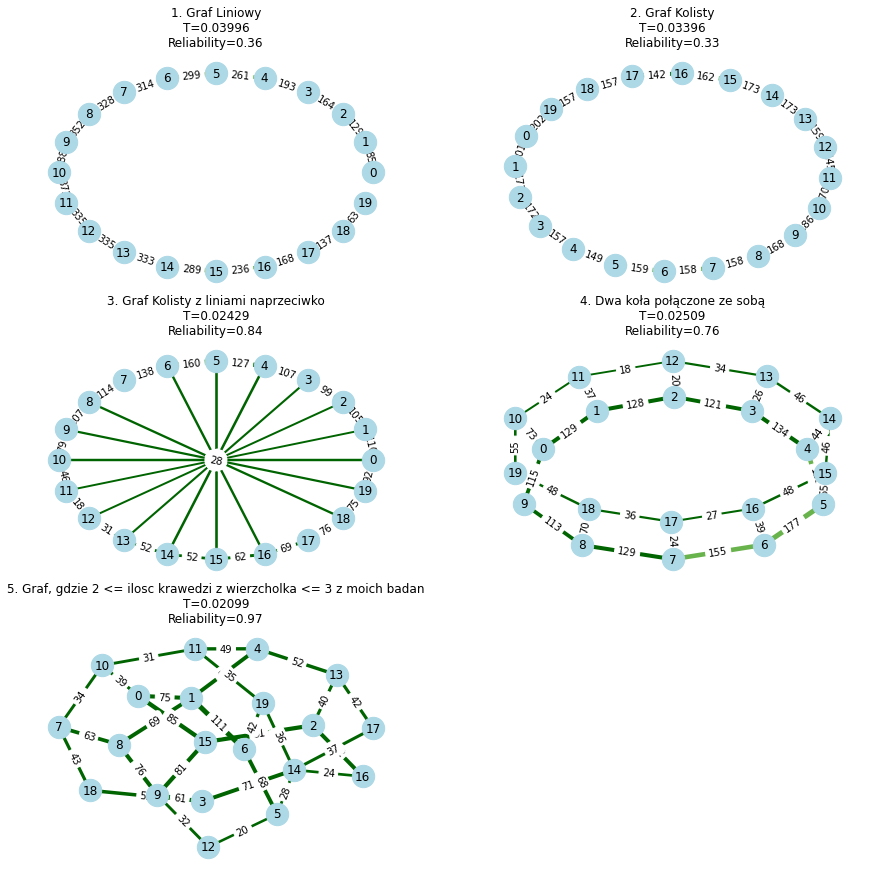

In [7]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs[2][1].remove()
axses = dict(zip(keys, [axs[0][0], axs[0][1], axs[1][0], axs[1][1], axs[2][0]]))
Ts = dict()
T_max = 0.1
reliabilities = dict()
for key in keys:
    calculateA(graphs[key])
    Ts[key] = (round(calculateT(graphs[key]),5))
    reliabilities[key] = (reliability(graphs[key], T_max, test_amount=100))
    
for key in keys:
    calculateA(graphs[key])
    draw_with_flow_capacity(graphs[key], ax=axses[key], circular=circular[key], label=labels[key] + f"\nT={Ts[key]}\nReliability={reliabilities[key]}")
plt.show()

## Badanie 1
Celem badania jest zobaczenie jak będzie się zmieniać niezawodność grafu gdy  
Będziemy zwiększać wartości macierzy natężeń. Czyli dla $x \in \{0..10\}$ mamy  $$N_x[i][j] = N[i][j] * (1+ \frac{i}{20})$$

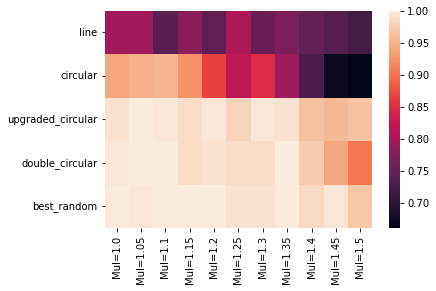

In [12]:
import seaborn as sn
import pandas as pd

saved_N = N.copy()
reliability_data = dict()
xticklabels = []
for key in keys:
    reliability_data[key] = []
for x in range(0,10+1):
    mul = round((1 + x/20),2)
    N = np.around(saved_N * mul)
    xticklabels.append(f"Mul={mul}")
    for key in keys:
        reliability_data[key].append(reliability(graphs[key], T_max, p=0.95))
N = saved_N.copy()

data_to_plot = []
for key in keys:
    data_to_plot.append(reliability_data[key])

heatmap1 = sn.heatmap(data= data_to_plot, 
                      xticklabels=xticklabels,
                      yticklabels=keys)

## Badanie 2
Celem badania jest zobaczenie jak bedzie sie zmieniała niezawodność grafu gdy będziemy zwiększać przepustowość  
Czyli dla $x \in \{0..10\}$ mamy  $$C_x[i][j] = C[i][j] * (1+ \frac{i}{20})$$

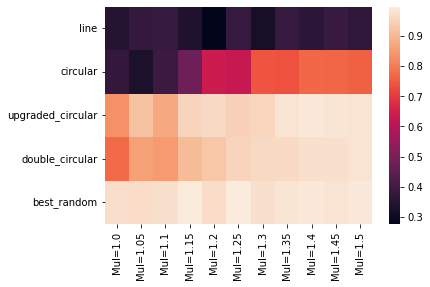

In [9]:
saved_C = deepcopy(C)
reliability_data = dict()
xticklabels = []
for key in keys:
    reliability_data[key] = []
for x in range(0,10+1):
    mul = round((1+x/20),2)
    for key in keys:
        for edge in graphs[key].edges():
            C[key][edge] = saved_C[key][edge] * mul
    xticklabels.append(f"Mul={mul}")
    for key in keys:
        reliability_data[key].append(reliability(graphs[key], T_max, p=0.95))
C = saved_C.copy()

data_to_plot = []
for key in keys:
    data_to_plot.append(reliability_data[key])

heatmap1 = sn.heatmap(data= data_to_plot, 
                      xticklabels=xticklabels,
                      yticklabels=keys)

## Badanie 3
Celem badania jest zobaczenie jak bedzie zmieniala sie niezawodność grafu gdy w każdej kolejnej iteracji będziemy dodawać po jednej krawędzi pomiędzy losowymi node'ami.  
Każda krawędź ma taką samą szanse na zostanie wybranej.  

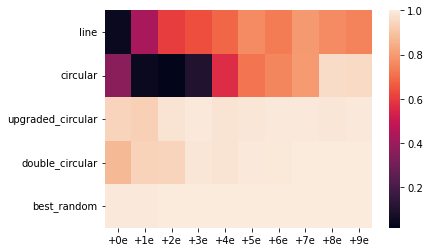

In [10]:
reliability_data = dict()
xticklabels = list(map(lambda x: f"+{x}e", list(range(10))))
C_mean = dict()
amount = 0
for key in keys:
    reliability_data[key] = []
for key in keys:
    C_mean[key] = 0
    for c in C[key].values():
        C_mean[key] += c
    C_mean[key] /= 29

for key in keys:
    for x in range(10):
        v1 = np.random.choice(graphs[key].nodes())
        v2 = np.random.choice(graphs[key].nodes())
        while (v1,v2) in graphs[key].edges() or v1==v2:
            v1 = np.random.choice(graphs[key].nodes())
            v2 = np.random.choice(graphs[key].nodes())
        graphs[key].add_edge(v1, v2)
        C[key][(v1, v2)] = C_mean[key]
        C[key][(v2, v1)] = C_mean[key]
        saved_edges[key].append((v1, v2))
        saved_edges[key].append((v2, v1))
        calculateA(graphs[key])
        reliability_data[key].append(reliability(graphs[key], T_max, p=0.95))
data_to_plot = []
for key in keys:
    data_to_plot.append(reliability_data[key])
heatmap1 = sn.heatmap(data= data_to_plot, 
                      xticklabels=xticklabels,
                      yticklabels=keys)            
                  


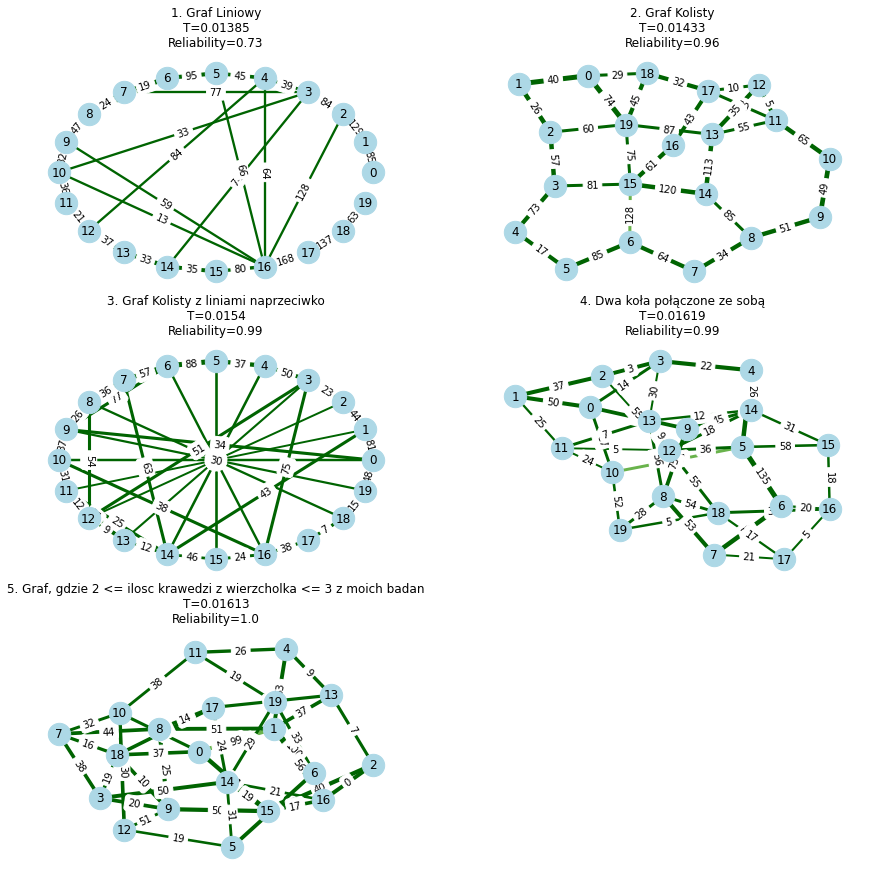

In [11]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs[2][1].remove()
axses = dict(zip(keys, [axs[0][0], axs[0][1], axs[1][0], axs[1][1], axs[2][0]]))
Ts = dict()
T_max = 0.1
reliabilities = dict()
for key in keys:
    calculateA(graphs[key])
    Ts[key] = (round(calculateT(graphs[key]),5))
    reliabilities[key] = (reliability(graphs[key], T_max, test_amount=100))
    
for key in keys:
    calculateA(graphs[key])
    draw_with_flow_capacity(graphs[key], ax=axses[key], circular=circular[key], label=labels[key] + f"\nT={Ts[key]}\nReliability={reliabilities[key]}")
plt.show()